In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [4]:
forestfires = pd.read_table("https://raw.githubusercontent.com/FyzHsn/Forest-fires-multivariate-regression/b3f213503ceca17ef2ffe9eea1eb44ec96389057/Data/forestfires.csv",sep=",")

forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [13]:
order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
forestfires["month"] = pd.Categorical(forestfires["month"], categories=order, ordered=True)

# Sort the DataFrame based on the custom order of months
sorted_forestfires = forestfires.sort_values(by="month")

sorted_forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


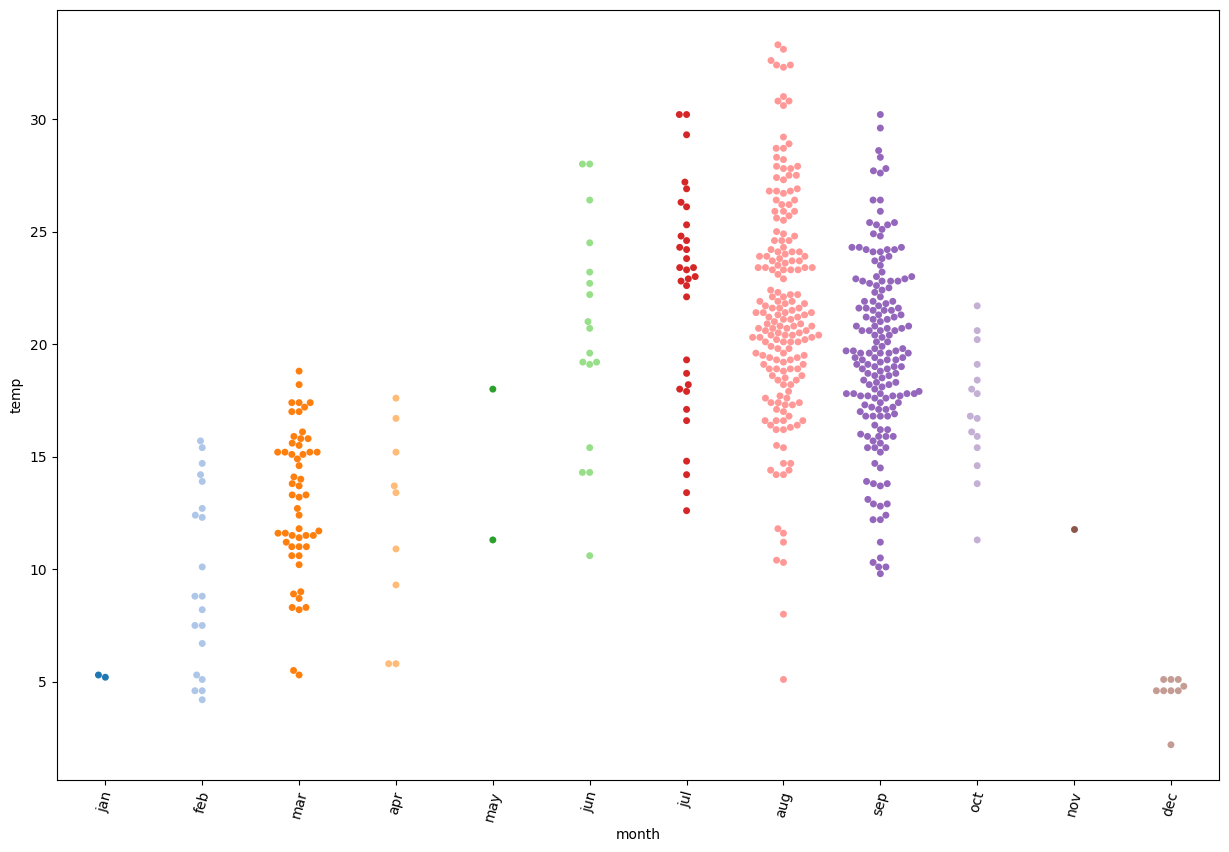

In [14]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="month", y="temp",data=sorted_forestfires, hue="month", palette="tab20") 
plt.xticks(rotation=75)
plt.show()

In [17]:
# Calculating Average Tempratures by month
group_month = forestfires.groupby('month')['temp'].agg('mean').reset_index().sort_values(ascending=False, by='temp')

group_month

C:\Users\Ataberk\AppData\Local\Temp\ipykernel_8360\3244842687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month = forestfires.groupby('month')['temp'].agg('mean').reset_index().sort_values(ascending=False, by='temp')


,month,temp
6,jul,22.109375
7,aug,21.631522
5,jun,20.494118
8,sep,19.612209
9,oct,17.093333
4,may,14.650000
2,mar,13.083333
3,apr,12.044444
10,nov,11.800000
1,feb,9.635000


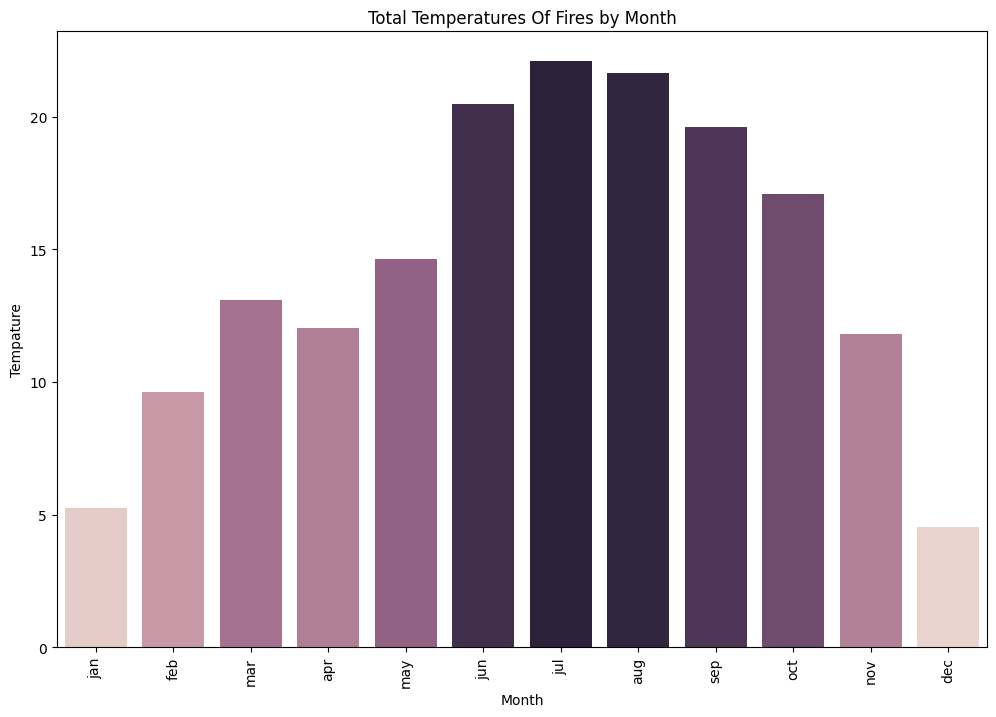

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=group_month,x='month',y='temp', hue="temp", legend=None) 
ax.set(xlabel='Month',ylabel='Tempature',title='Total Temperatures Of Fires by Month') 
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Ataberk\AppData\Local\Temp\ipykernel_8360\2441549501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=forestfires, x="month", y="temp",


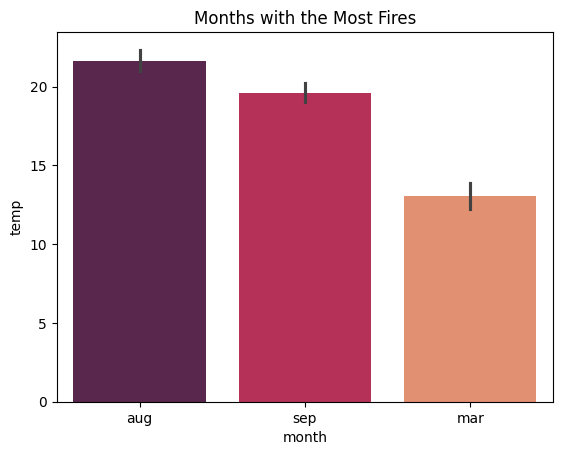

In [38]:
sns.barplot(data=forestfires, x="month", y="temp",
           order=["aug","sep", "mar"], palette="rocket") # Taking the specific datas to the chart
plt.title('Months with the Most Fires')
plt.show()

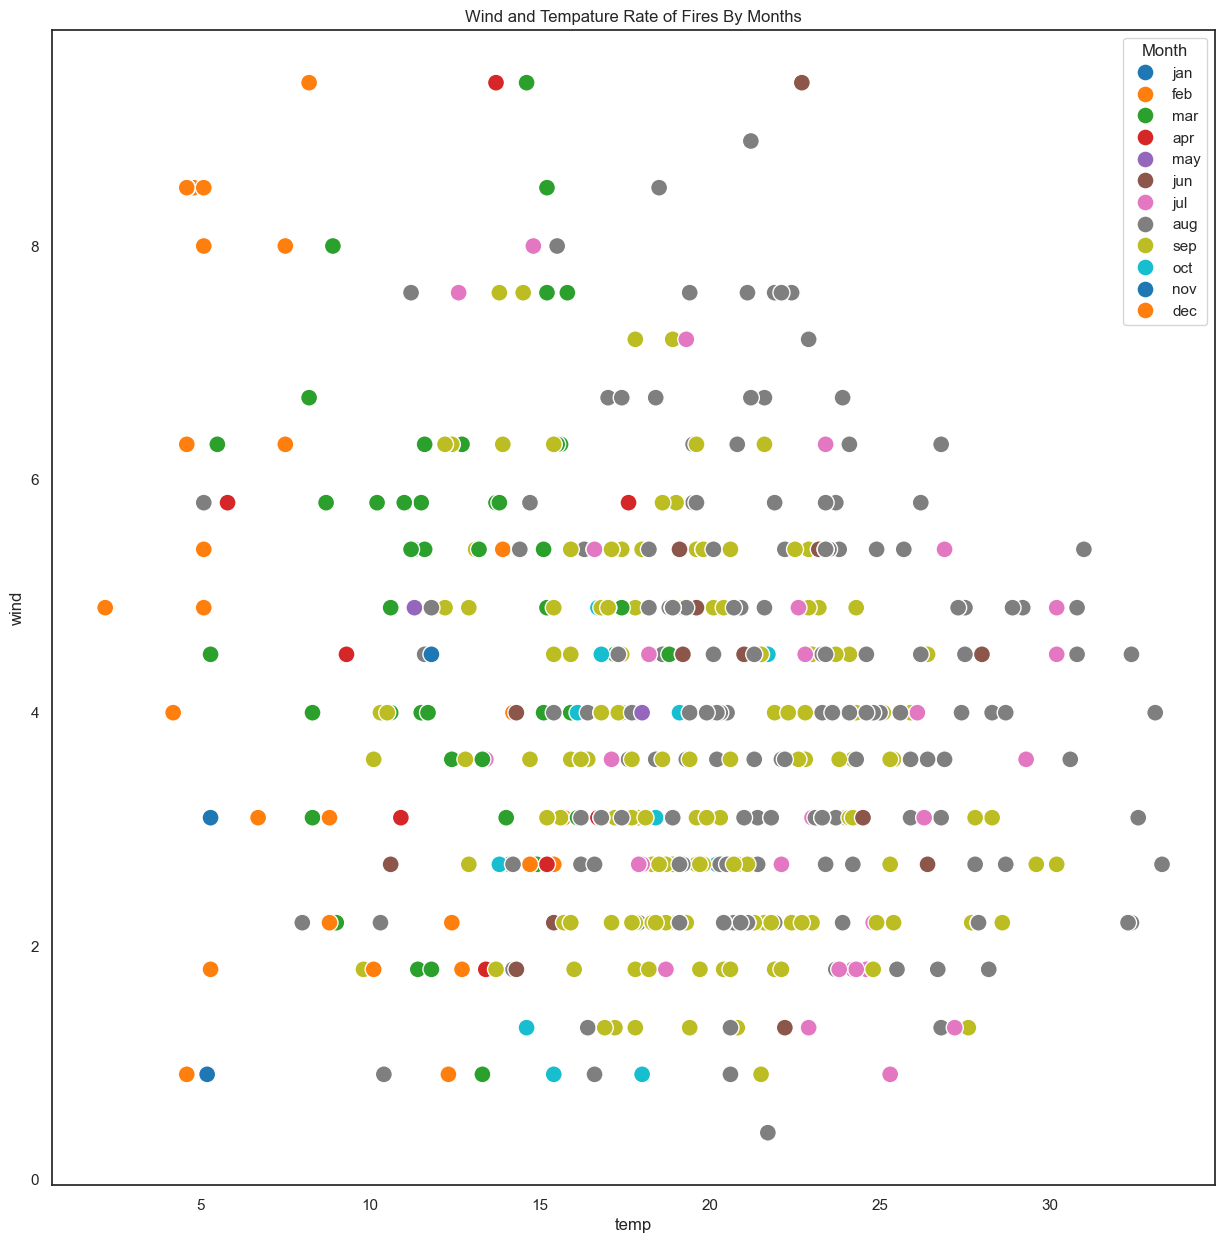

In [43]:
plt.subplots(figsize=(15, 15)) 

sns.set_theme(style="white")

sns.scatterplot(data = forestfires,
                x = "temp", y = "wind",
                hue = "month", palette="tab10",
                s = 150,
                )
plt.title('Wind and Tempature Rate of Fires By Months')
plt.legend(title="Month", bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x1000 with 0 Axes>

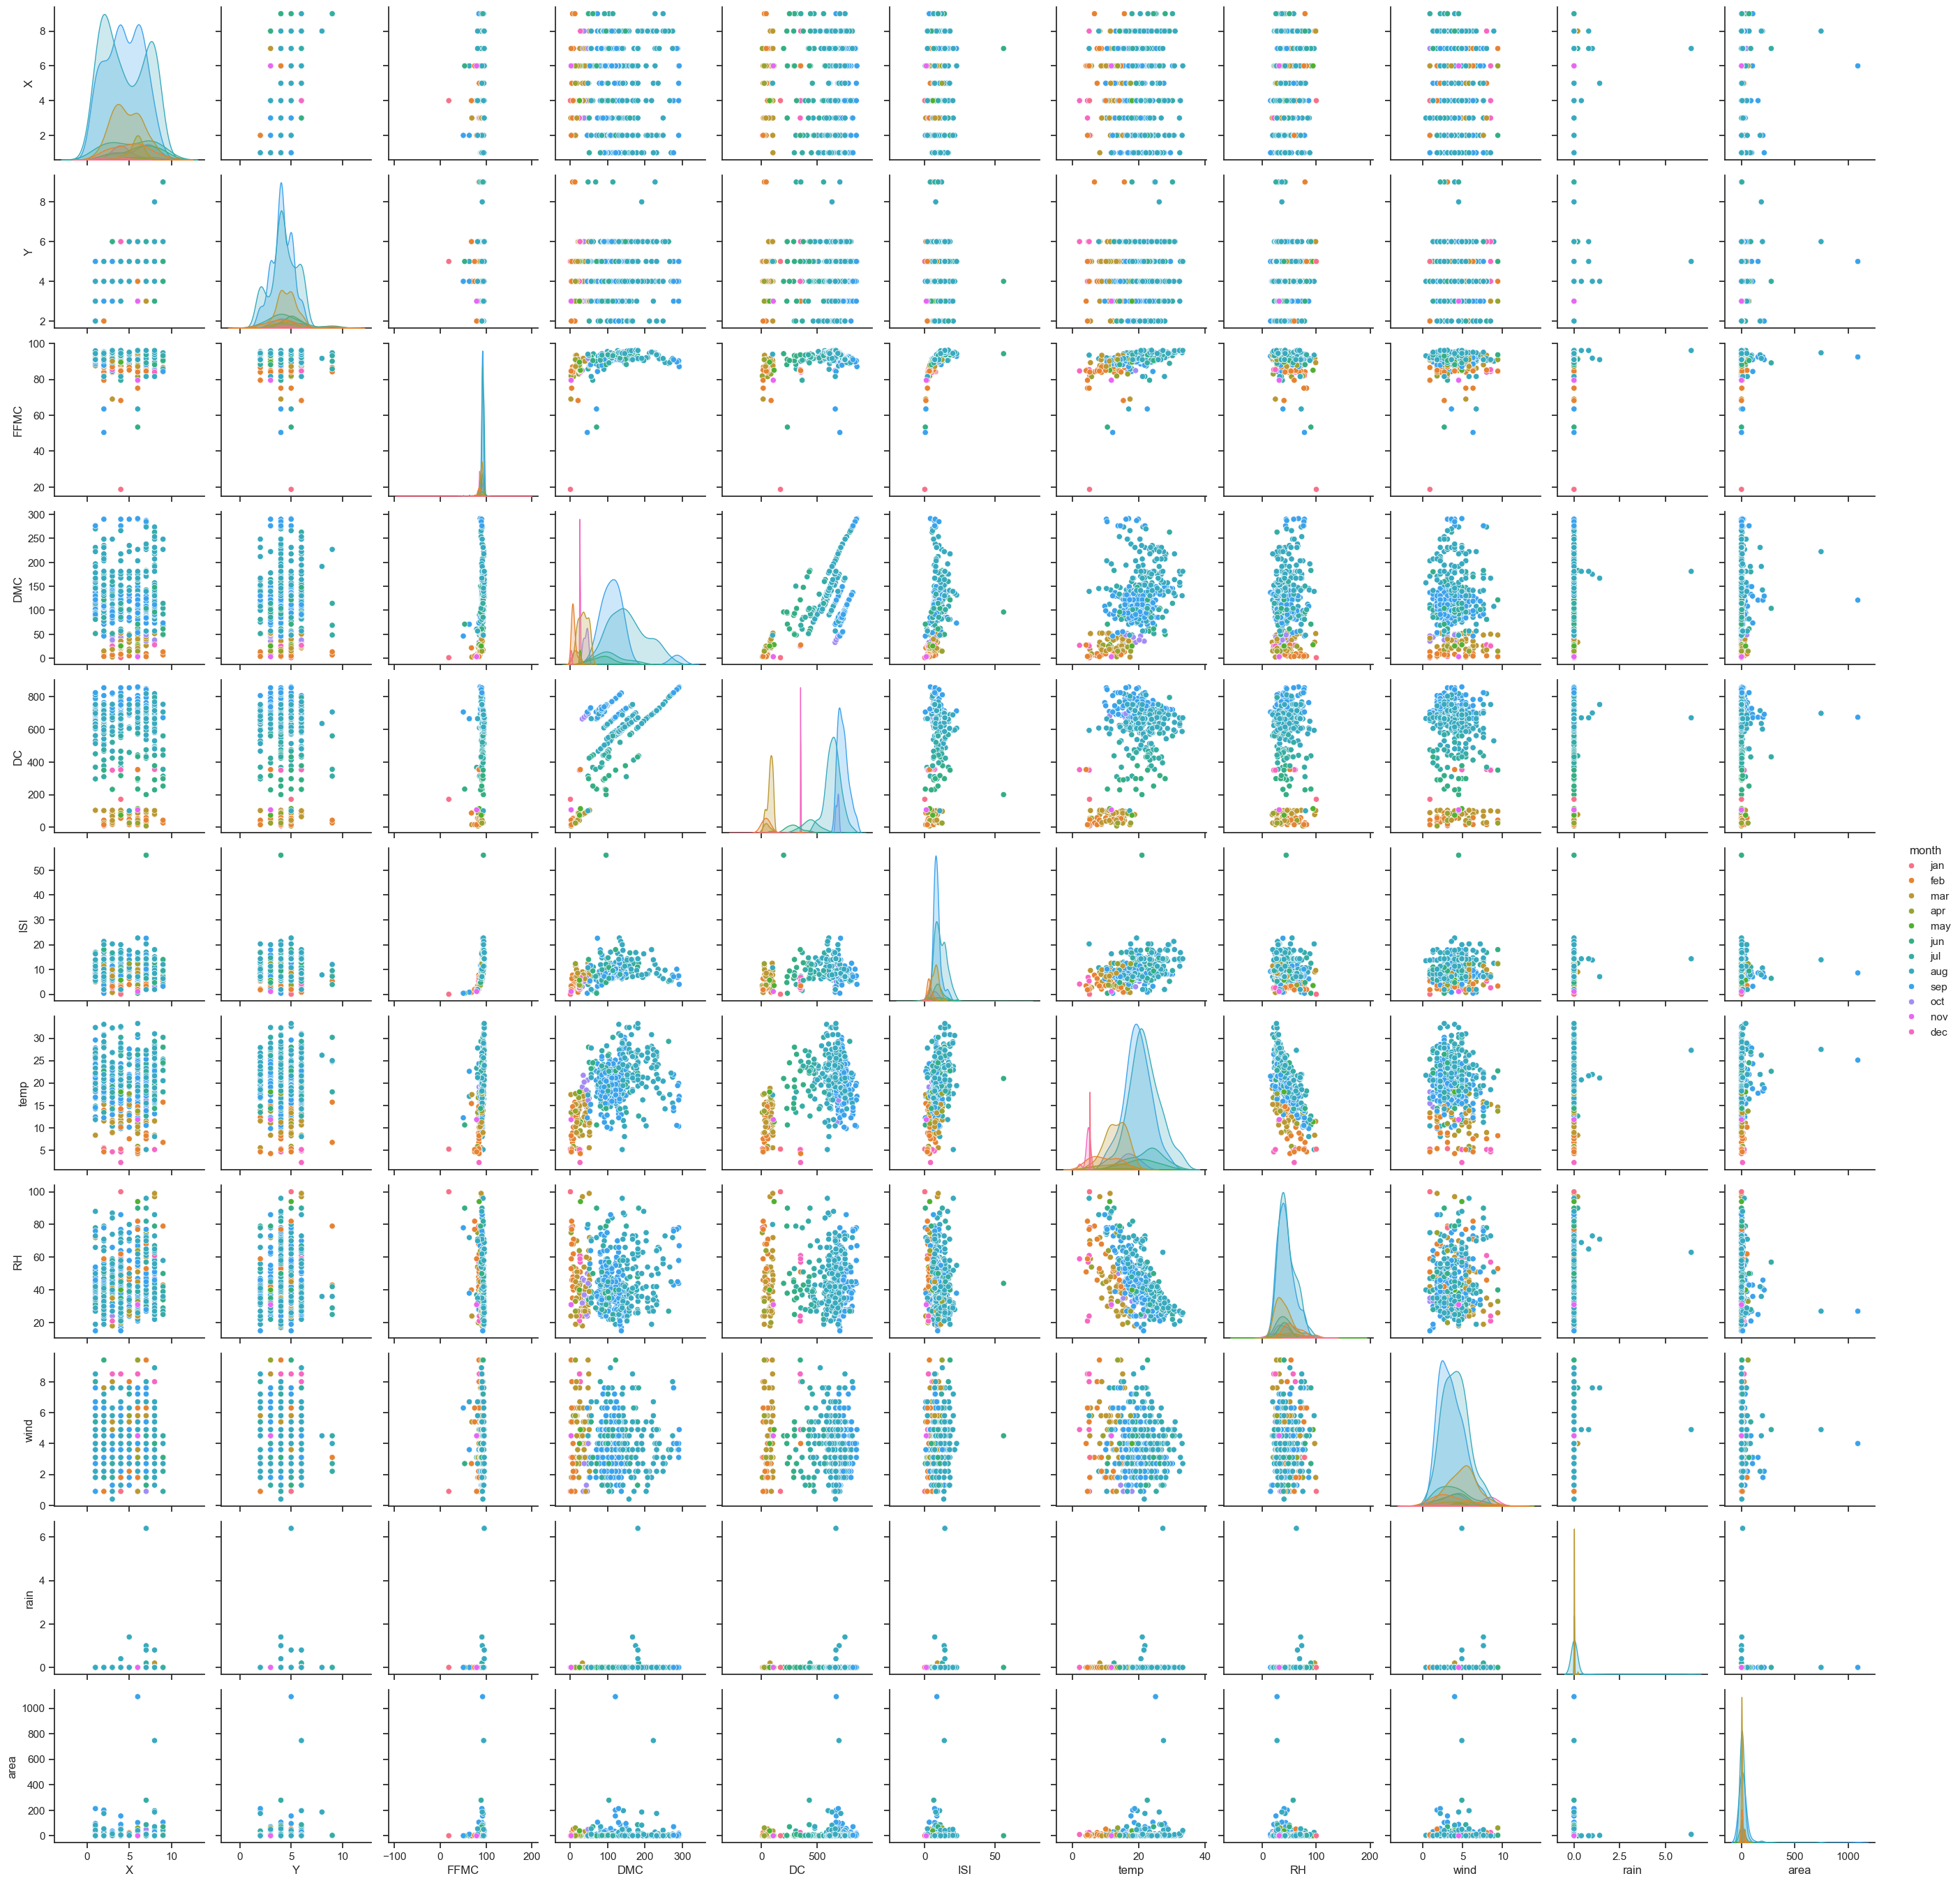

In [54]:
plt.figure(figsize=(10,10))
sns.set_theme(style="ticks") # Determining the theme style("ticks")
sns.pairplot(forestfires, hue="month")